In [15]:
import pandas as pd 
import numpy as np 
from matplotlib import pyplot as plt 
import seaborn as sns 

In [16]:
df = pd.read_csv('healthcare-dataset-stroke-data.csv')
df

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
...,...,...,...,...,...,...,...,...,...,...,...,...
5105,18234,Female,80.0,1,0,Yes,Private,Urban,83.75,NaN,never smoked,0
5106,44873,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked,0
5107,19723,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,0
5108,37544,Male,51.0,0,0,Yes,Private,Rural,166.29,25.6,formerly smoked,0


In [17]:
df.describe()

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,4909.000000,5110.000000
mean,36517.829354,43.226614,0.097456,0.054012,106.147677,28.893237,0.048728
std,21161.721625,22.612647,0.296607,0.226063,45.283560,7.854067,0.215320
min,67.000000,0.080000,0.000000,0.000000,55.120000,10.300000,0.000000
25%,17741.250000,25.000000,0.000000,0.000000,77.245000,23.500000,0.000000
50%,36932.000000,45.000000,0.000000,0.000000,91.885000,28.100000,0.000000
75%,54682.000000,61.000000,0.000000,0.000000,114.090000,33.100000,0.000000
max,72940.000000,82.000000,1.000000,1.000000,271.740000,97.600000,1.000000


In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


In [19]:
duplicate = df[df.duplicated('id')]
duplicate

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke


In [20]:
from sklearn import preprocessing

categorical_cols = ['gender', 'ever_married', 'work_type', 'Residence_type', 'smoking_status']
label_encoder = preprocessing.LabelEncoder()
for col in categorical_cols:
    df[col] = label_encoder.fit_transform(df[col])
    
    

In [21]:
df.dtypes

id                     int64
gender                 int32
age                  float64
hypertension           int64
heart_disease          int64
ever_married           int32
work_type              int32
Residence_type         int32
avg_glucose_level    float64
bmi                  float64
smoking_status         int32
stroke                 int64
dtype: object

In [22]:
df.columns

Index(['id', 'gender', 'age', 'hypertension', 'heart_disease', 'ever_married',
       'work_type', 'Residence_type', 'avg_glucose_level', 'bmi',
       'smoking_status', 'stroke'],
      dtype='object')

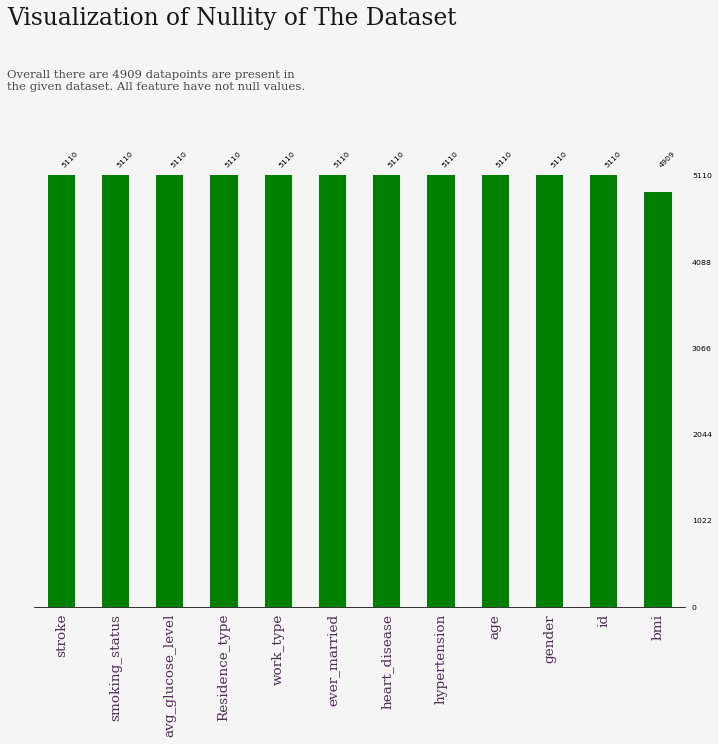

In [23]:
import missingno as msno

color = ['green', 'green', 'green', 'green', 'green', 'green', 'green', 'green', 'green', 'green', 'green', 'green']
fig, ax = plt.subplots(figsize=(12, 8), dpi=70)
fig.patch.set_facecolor('#f6f5f5')
ax.set_facecolor('#f6f5f5')

msno.bar(df, sort='descending', color=color, ax=ax, fontsize=8, labels='off', filter='top')

ax.text(-1, 1.35, 'Visualization of Nullity of The Dataset', {'font': 'Serif', 'size': 24, 'color': 'black'}, alpha=0.9)
ax.text(-1, 1.2, 'Overall there are 4909 datapoints are present in \nthe given dataset. All feature have not null values.',
        {'font': 'Serif', 'size': 12, 'color': 'black'}, alpha=0.7)

ax.set_xticklabels(ax.get_xticklabels(), rotation=90, ha='center',
                   **{'font': 'Serif', 'size': 14, 'weight': 'normal', 'color': '#512b58'}, alpha=1)
ax.set_yticklabels('')
ax.spines['bottom'].set_visible(True)

plt.show()


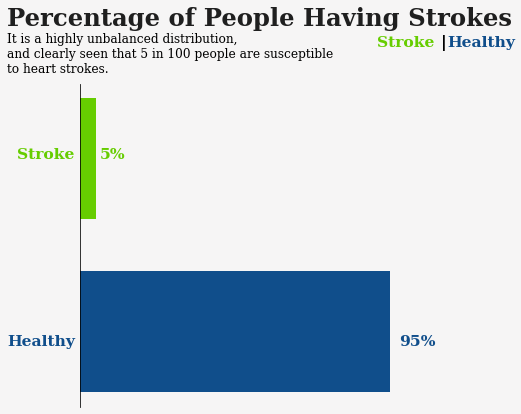

In [24]:
x = pd.DataFrame( df.groupby(['stroke'])['stroke'].count())

# plot
fig, ax = plt.subplots(figsize=(6, 6), dpi=70)
ax.barh([1], x.stroke[1], height=0.7, color='#66CD00')
plt.text(-1150, -0.08, 'Healthy', {'font': 'Serif', 'weight': 'bold', 'size': 16, 'style': 'normal', 'color': '#104E8B'})
plt.text(5000, -0.08, '95%', {'font': 'Serif', 'weight': 'bold', 'size': 16, 'color': '#104E8B'})
ax.barh([0], x.stroke[0], height=0.7, color='#104E8B')
plt.text(-1000, 1, 'Stroke', {'font': 'Serif', 'weight': 'bold', 'size': 16, 'style': 'normal', 'color': '#66CD00'})
plt.text(300, 1, '5%', {'font': 'Serif', 'weight': 'bold', 'size': 16, 'color': '#66CD00'})

fig.patch.set_facecolor('#f6f5f5')
ax.set_facecolor('#f6f5f5')

plt.text(-1150, 1.77, 'Percentage of People Having Strokes', {'font': 'Serif', 'size': 25, 'weight': 'bold', 'color': '#1F1F1F'})
plt.text(4650, 1.65, 'Stroke', {'font': 'Serif', 'weight': 'bold', 'size': 16, 'style': 'normal', 'color': '#66CD00'})
plt.text(5650, 1.65, '|', {'color': 'black', 'size': 16, 'weight': 'bold'})
plt.text(5750, 1.65, 'Healthy', {'font': 'Serif', 'weight': 'bold', 'size': 16, 'style': 'normal', 'weight': 'bold', 'color': '#104E8B'})
plt.text(-1150, 1.5, 'It is a highly unbalanced distribution,\nand clearly seen that 5 in 100 people are susceptible\nto heart strokes.',
         {'font': 'Serif', 'size': 12.5, 'color': 'black'})



ax.axes.get_xaxis().set_visible(False)
ax.axes.get_yaxis().set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['left'].set_visible(True)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)


C:\Users\Predator\AppData\Local\Temp\ipykernel_26392\3805718780.py:26: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data = df, x = 'age', ax = ax2, shade = True, color = '#6E7B8B', alpha = 1, )
C:\Users\Predator\AppData\Local\Temp\ipykernel_26392\3805718780.py:41: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data = df[df['stroke'] == 0], x = 'age',ax = ax3, shade = True,  alpha = 1, color = '#FF7F24' )
C:\Users\Predator\AppData\Local\Temp\ipykernel_26392\3805718780.py:42: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data = df[df['stroke'] == 1], x = 'age',ax = ax3, shade = True,  alpha = 0.8, color = '#00CED1')
C:\Use

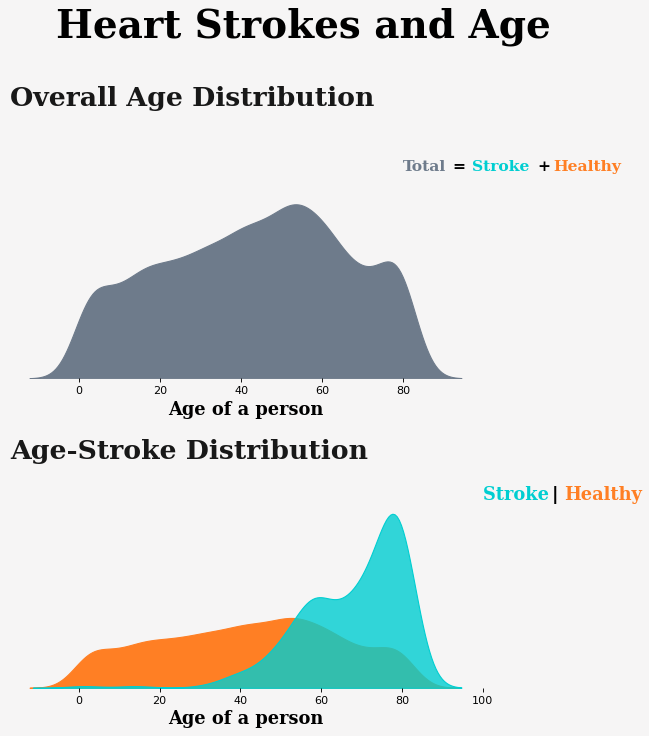

In [25]:
fig = plt.figure(figsize = (24,10), dpi = 80)

gs = fig.add_gridspec(10,24)
gs.update(wspace = 1, hspace = 0.05)


ax2 = fig.add_subplot(gs[1:4,0:8]) #distribution plot
ax3 = fig.add_subplot(gs[6:9, 0:8]) #hue distribution plot

# axes list
axes = [ ax2, ax3]

# setting of axes; visibility of axes and spines turn off
for ax in axes:
    ax.axes.get_yaxis().set_visible(False)
    ax.set_facecolor('#f6f5f5')
    
    for loc in ['left', 'right', 'top', 'bottom']:
        ax.spines[loc].set_visible(False)

fig.patch.set_facecolor('#f6f5f5')
        

# distribution plots ---- only single variable

sns.kdeplot(data = df, x = 'age', ax = ax2, shade = True, color = '#6E7B8B', alpha = 1, )
ax2.set_xlabel('Age of a person', fontdict = {'font':'Serif', 'color': 'black', 'size': 16,'weight':'bold' })
ax2.text(-17,0.025,'Overall Age Distribution', {'font':'Serif', 'color': 'black','weight':'bold','size':24}, alpha = 0.9)

ax2.text(80,0.019, 'Total',{'font':'Serif', 'size':'14','color': '#6E7B8B','weight':'bold'})
ax2.text(92,0.019, '=',{'font':'Serif', 'size':'14','color': 'black','weight':'bold'})
ax2.text(97,0.019, 'Stroke',{'font':'Serif', 'size':'14','color': '#00CED1','weight':'bold'})
ax2.text(113,0.019, '+',{'font':'Serif', 'size':'14','color': 'black','weight':'bold'})
ax2.text(117,0.019, 'Healthy',{'font':'Serif', 'size':'14','color': '#FF7F24','weight':'bold'})



# distribution plots with hue of strokes


sns.kdeplot(data = df[df['stroke'] == 0], x = 'age',ax = ax3, shade = True,  alpha = 1, color = '#FF7F24' )
sns.kdeplot(data = df[df['stroke'] == 1], x = 'age',ax = ax3, shade = True,  alpha = 0.8, color = '#00CED1')

ax3.set_xlabel('Age of a person', fontdict = {'font':'Serif', 'color': 'black', 'weight':'bold','size': 16})

ax3.text(-17,0.0525,'Age-Stroke Distribution', {'font':'Serif', 'weight':'bold','color': 'black', 'size':24}, alpha= 0.9)

ax3.text(100,0.043, 'Stroke ', {'font': 'Serif','weight':'bold','size': '16','weight':'bold','style':'normal', 'color':'#00CED1'})
ax3.text(117,0.043, '|', {'color':'black' , 'size':'16', 'weight': 'bold'})
ax3.text(120,0.043, 'Healthy', {'font': 'Serif','weight':'bold', 'size': '16','style':'normal', 'weight':'bold','color':'#FF7F24'})

fig.text(0.15,1,'Heart Strokes and Age',{'font':'Serif', 'weight':'bold','color': 'black', 'size':35})
fig.show()

C:\Users\Predator\AppData\Local\Temp\ipykernel_26392\396775302.py:25: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data = df, x = 'avg_glucose_level', ax = ax2, shade = True, color = '#2c003e', alpha = 1, )
C:\Users\Predator\AppData\Local\Temp\ipykernel_26392\396775302.py:40: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data = df[df['stroke'] == 0], x = 'avg_glucose_level',ax = ax3, shade = True,  alpha = 1, color = '#512b58' )
C:\Users\Predator\AppData\Local\Temp\ipykernel_26392\396775302.py:41: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data = df[df['stroke'] == 1], x = 'avg_glucose_level',ax = ax3, shade = True, 

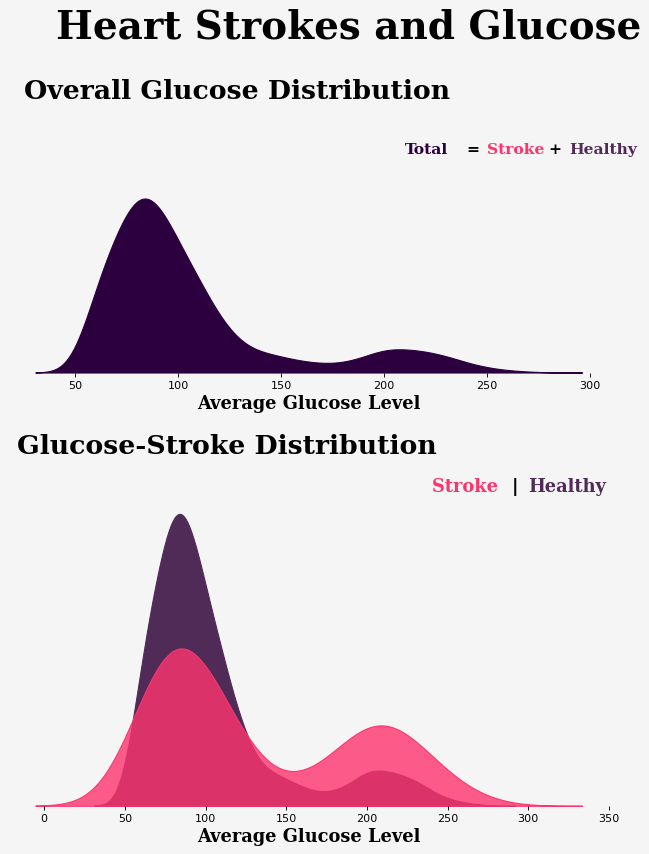

In [26]:
fig = plt.figure(figsize = (24,10), dpi = 80)

gs = fig.add_gridspec(10,24)
gs.update(wspace = 1, hspace = 0.05)


ax2 = fig.add_subplot(gs[0:3,0:10]) #distribution plot
ax3 = fig.add_subplot(gs[5:10, 0:10]) #hue distribution plot

# axes list
axes = [ax2, ax3]

# setting of axes; visibility of axes and spines turn off
for ax in axes:
    ax.axes.get_yaxis().set_visible(False)
    ax.set_facecolor('#f6f5f5')
    
    for loc in ['left', 'right', 'top', 'bottom']:
        ax.spines[loc].set_visible(False)

fig.patch.set_facecolor('#f6f5f5')
        
# distribution plots ---- only single variable

sns.kdeplot(data = df, x = 'avg_glucose_level', ax = ax2, shade = True, color = '#2c003e', alpha = 1, )
ax2.set_xlabel('Average Glucose Level', fontdict = {'font':'Serif', 'color': 'black', 'size': 16,'weight':'bold' })
ax2.text(25,0.025,'Overall Glucose Distribution', {'font':'Serif', 'color': 'black','weight':'bold','size':24})

ax2.text(210,0.020, 'Total',{'font':'Serif', 'size':'14','color': '#2c003e','weight':'bold'})
ax2.text(240,0.02, '=',{'font':'Serif', 'size':'14','color': 'black','weight':'bold'})
ax2.text(250,0.02, 'Stroke',{'font':'Serif', 'size':'14','color': '#fe346e','weight':'bold'})
ax2.text(280,0.02, '+',{'font':'Serif', 'size':'14','color': 'black','weight':'bold'})
ax2.text(290,0.02, 'Healthy',{'font':'Serif', 'size':'14','color': '#512b58','weight':'bold'})



# distribution plots with hue of strokes


sns.kdeplot(data = df[df['stroke'] == 0], x = 'avg_glucose_level',ax = ax3, shade = True,  alpha = 1, color = '#512b58' )
sns.kdeplot(data = df[df['stroke'] == 1], x = 'avg_glucose_level',ax = ax3, shade = True,  alpha = 0.8, color = '#fe346e')

ax3.set_xlabel('Average Glucose Level', fontdict = {'font':'Serif', 'color': 'black', 'weight':'bold','size': 16})

ax3.text(-17,0.0195,'Glucose-Stroke Distribution', {'font':'Serif', 'weight':'bold','color': 'black', 'size':24})

ax3.text(240,0.0174, 'Stroke ', {'font': 'Serif','weight':'bold','size': '16','weight':'bold','style':'normal', 'color':'#fe346e'})
ax3.text(290,0.0174, '|', {'color':'black' , 'size':'16', 'weight': 'bold'})
ax3.text(300,0.0174, 'Healthy', {'font': 'Serif','weight':'bold', 'size': '16','style':'normal', 'weight':'bold','color':'#512b58'})


fig.text(0.15,1.07,'Heart Strokes and Glucose',{'font':'Serif', 'weight':'bold','color': 'black', 'size':35})

fig.show()

C:\Users\Predator\AppData\Local\Temp\ipykernel_26392\953642023.py:25: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data = df, x = 'bmi', ax = ax2, shade = True, color = '#2c003e', alpha = 1, )
C:\Users\Predator\AppData\Local\Temp\ipykernel_26392\953642023.py:39: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data = df[df['stroke'] == 0], x = 'bmi',ax = ax3, shade = True,  alpha = 1, color = '#512b58' )
C:\Users\Predator\AppData\Local\Temp\ipykernel_26392\953642023.py:40: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data = df[df['stroke'] == 1], x = 'bmi',ax = ax3, shade = True,  alpha = 0.8, color = '#fe346e')
C:\Users\

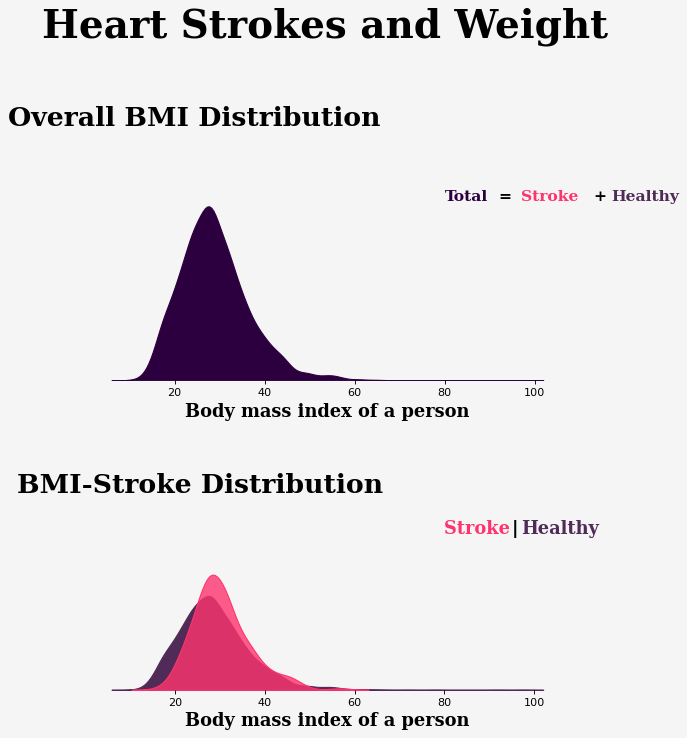

In [27]:
fig = plt.figure(figsize = (24,10),dpi = 80)

gs = fig.add_gridspec(10,24)
gs.update(wspace = 1, hspace = 0.05)


ax2 = fig.add_subplot(gs[2:5,0:8]) #distribution plot
ax3 = fig.add_subplot(gs[8:10, 0:8]) #hue distribution plot

# axes list
axes = [ax2, ax3]

# setting of axes; visibility of axes and spines turn off
for ax in axes:
    ax.axes.get_yaxis().set_visible(False)
    ax.set_facecolor('#f6f5f5')
    
    for loc in ['left', 'right', 'top', 'bottom']:
        ax.spines[loc].set_visible(False)

fig.patch.set_facecolor('#f6f5f5')
        
# distribution plots ---- only single variable

sns.kdeplot(data = df, x = 'bmi', ax = ax2, shade = True, color = '#2c003e', alpha = 1, )
ax2.set_xlabel('Body mass index of a person', fontdict = {'font':'Serif', 'color': 'black', 'size': 16,'weight':'bold' })
ax2.text(-17,0.085,'Overall BMI Distribution', {'font':'Serif', 'color': 'black','weight':'bold','size':24})

ax2.text(80,0.06, 'Total',{'font':'Serif', 'size':'14','color': '#2c003e','weight':'bold'})
ax2.text(92,0.06, '=',{'font':'Serif', 'size':'14','color': 'black','weight':'bold'})
ax2.text(97,0.06, 'Stroke',{'font':'Serif', 'size':'14','color': '#fe346e','weight':'bold'})
ax2.text(113,0.06, '+',{'font':'Serif', 'size':'14','color': 'black','weight':'bold'})
ax2.text(117,0.06, 'Healthy',{'font':'Serif', 'size':'14','color': '#512b58','weight':'bold'})


# distribution plots with hue of strokes


sns.kdeplot(data = df[df['stroke'] == 0], x = 'bmi',ax = ax3, shade = True,  alpha = 1, color = '#512b58' )
sns.kdeplot(data = df[df['stroke'] == 1], x = 'bmi',ax = ax3, shade = True,  alpha = 0.8, color = '#fe346e')

ax3.set_xlabel('Body mass index of a person', fontdict = {'font':'Serif', 'color': 'black', 'weight':'bold','size': 16})

ax3.text(-15,0.12,'BMI-Stroke Distribution', {'font':'Serif', 'weight':'bold','color': 'black', 'size':24})

ax3.text(80,0.095, 'Stroke ', {'font': 'Serif','weight':'bold','size': '16','weight':'bold','style':'normal', 'color':'#fe346e'})
ax3.text(95,0.095, '|', {'color':'black' , 'size':'16', 'weight': 'bold'})
ax3.text(97,0.095, 'Healthy', {'font': 'Serif','weight':'bold', 'size': '16','style':'normal', 'weight':'bold','color':'#512b58'})

fig.text(0.1,0.925,'Heart Strokes and Weight',{'font':'Serif', 'weight':'bold','color': 'black', 'size':35})

fig.show()

In [28]:
df = df.dropna()
df.reset_index(drop= True, inplace= True)
df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,1,67.0,0,1,1,2,1,228.69,36.6,1,1
1,31112,1,80.0,0,1,1,2,0,105.92,32.5,2,1
2,60182,0,49.0,0,0,1,2,1,171.23,34.4,3,1
3,1665,0,79.0,1,0,1,3,0,174.12,24.0,2,1
4,56669,1,81.0,0,0,1,2,1,186.21,29.0,1,1


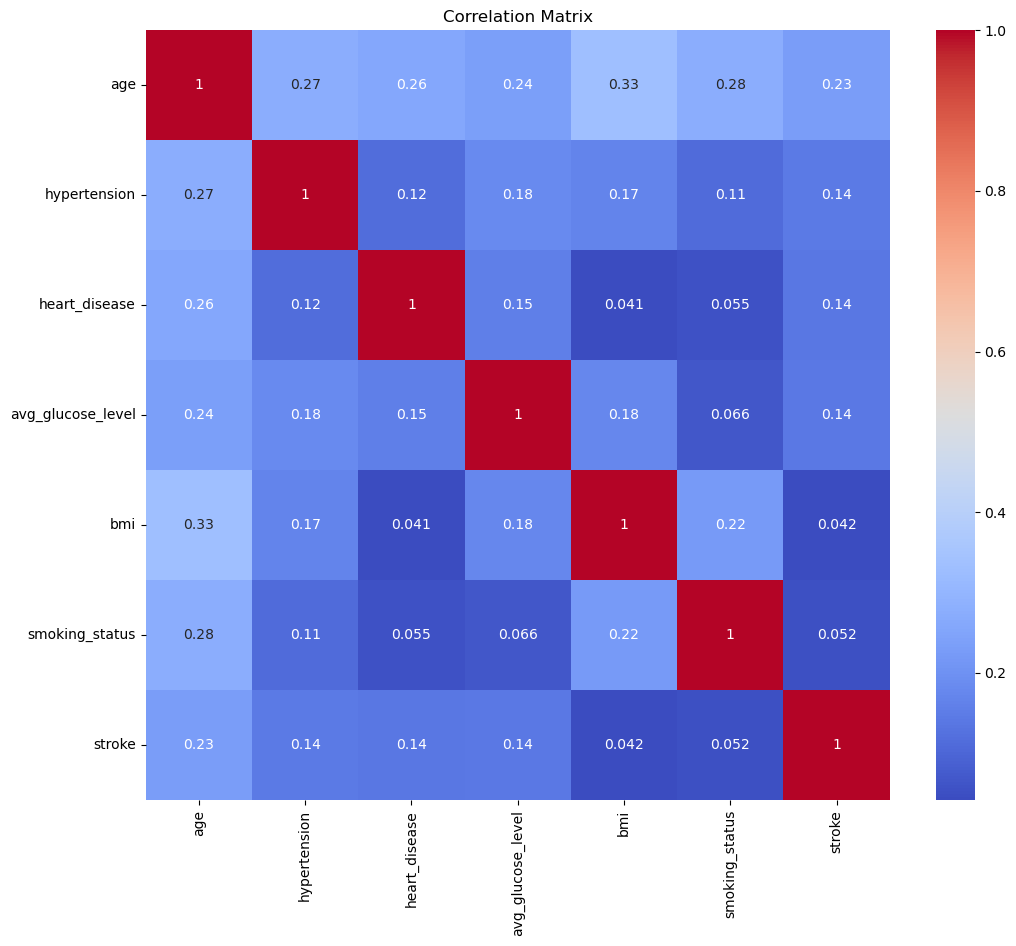

In [29]:
numeric_cols = ['age', 'hypertension','heart_disease', 'avg_glucose_level', 'bmi', 'smoking_status', 'stroke' ]
corr_matrix = df[numeric_cols].corr()

plt.figure(figsize= (12, 10))
sns.heatmap(corr_matrix, annot= True, cmap= 'coolwarm')
plt.title('Correlation Matrix')
plt.show()

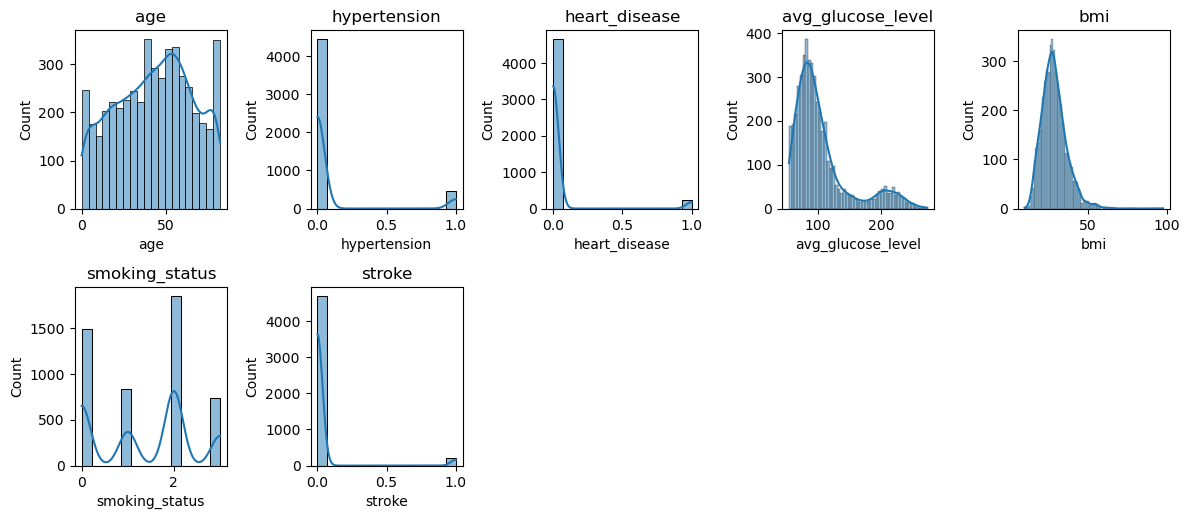

In [30]:
plt.figure(figsize= (12, 10))
for i, col in enumerate(numeric_cols):
    plt.subplot(4, 5, i+1)
    sns.histplot(df[col], kde= True)
    plt.title(col)
plt.tight_layout()
plt.show()

<Figure size 1200x1000 with 0 Axes>

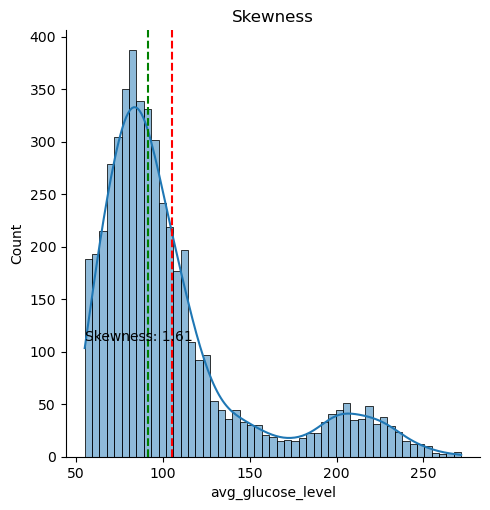

In [31]:
plt.figure(figsize=(12,10))
sns.displot(df['avg_glucose_level'], kde=True)
plt.title('Skewness')
plt.axvline(df['avg_glucose_level'].mean(), color='red', linestyle='dashed', linewidth=1.5)
plt.axvline(df['avg_glucose_level'].median(), color='green', linestyle='dashed', linewidth=1.5)
'''
plt.text(df['avg_glucose_level'].mean(), 150, f"Mean: {df['avg_glucose_level'].mean():.2f}", ha='right', fontsize=10)
plt.text(df['avg_glucose_level'].median(), 130, f"Median: {df['avg_glucose_level'].median():.2f}", ha='right', fontsize=10)
'''
plt.text(min(df['avg_glucose_level']), 110, f"Skewness: {df['avg_glucose_level'].skew():.2f}", ha='left', fontsize=10)

plt.show()

<Figure size 1200x1000 with 0 Axes>

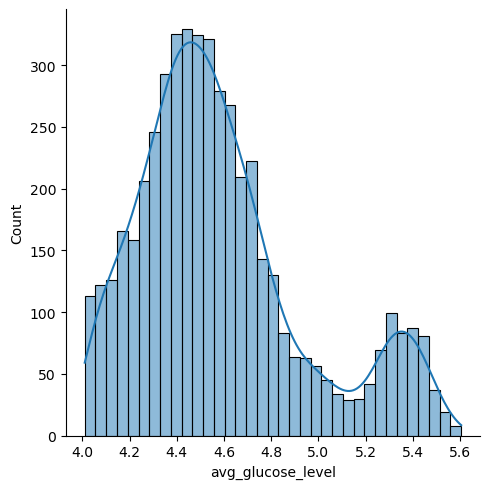

In [32]:
glu_log_transformed = np.log(df['avg_glucose_level'])

plt.figure(figsize=(12,10))
sns.displot(glu_log_transformed, kde=True)



<Figure size 1200x1000 with 0 Axes>

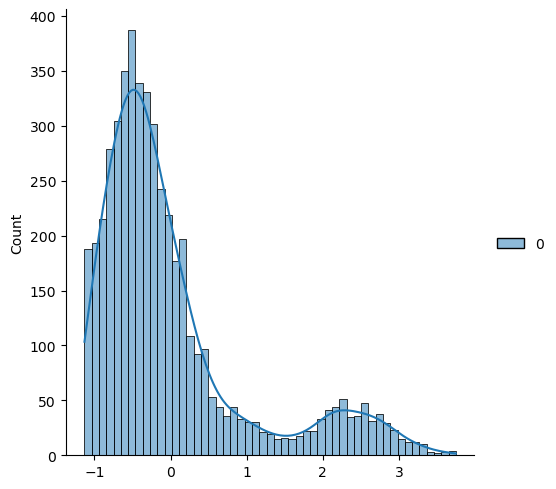

In [33]:
std_Scaler = preprocessing.StandardScaler()
glu_std_transformed = std_Scaler.fit_transform(df['avg_glucose_level'].values.reshape(-1, 1))

plt.figure(figsize=(12,10))
sns.displot(glu_std_transformed, kde=True)

<Axes: xlabel='avg_glucose_level'>

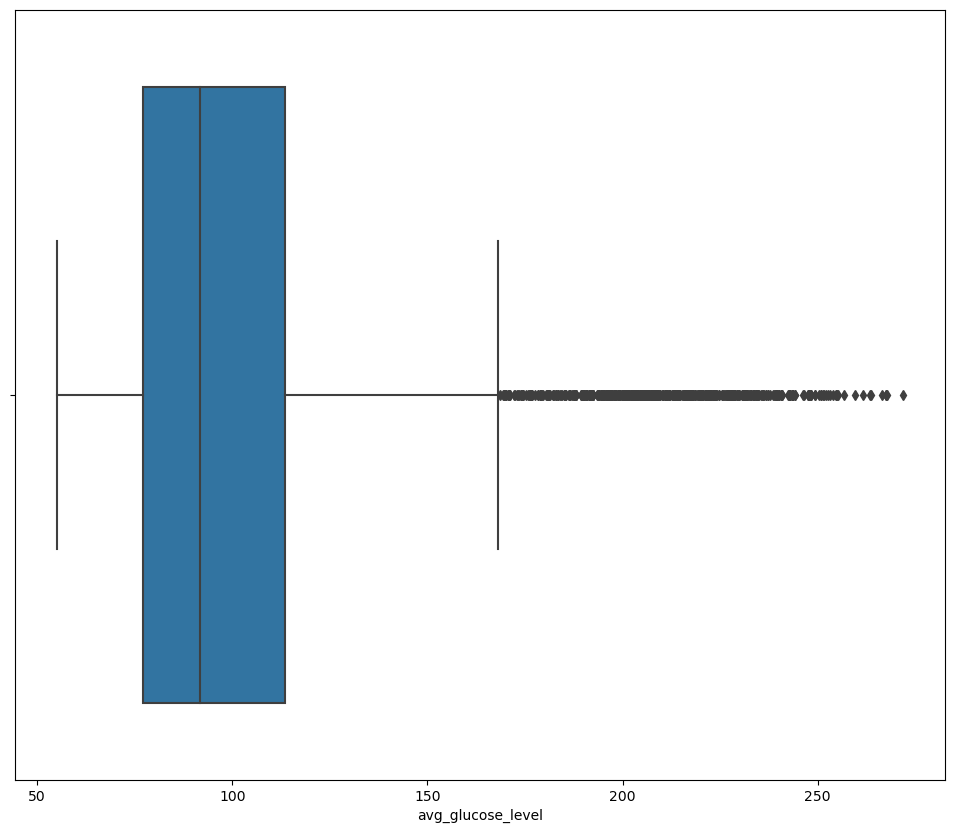

In [34]:
plt.figure(figsize=(12,10))
sns.boxplot(data= df, x= df['avg_glucose_level'])

<Figure size 1200x1000 with 0 Axes>

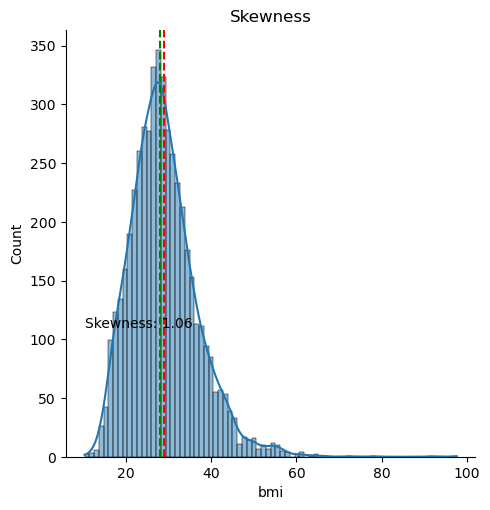

In [35]:
plt.figure(figsize=(12,10))
sns.displot(df['bmi'], kde=True)
plt.title('Skewness')
plt.axvline(df['bmi'].mean(), color='red', linestyle='dashed', linewidth=1.5)
plt.axvline(df['bmi'].median(), color='green', linestyle='dashed', linewidth=1.5)
'''
plt.text(df['avg_glucose_level'].mean(), 150, f"Mean: {df['avg_glucose_level'].mean():.2f}", ha='right', fontsize=10)
plt.text(df['avg_glucose_level'].median(), 130, f"Median: {df['avg_glucose_level'].median():.2f}", ha='right', fontsize=10)
'''
plt.text(min(df['bmi']), 110, f"Skewness: {df['bmi'].skew():.2f}", ha='left', fontsize=10)

plt.show()

<Figure size 1200x1000 with 0 Axes>

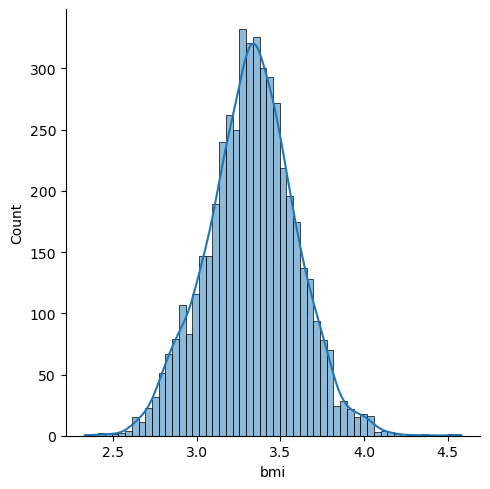

In [36]:
bmi_log_transformed = np.log(df['bmi'])

plt.figure(figsize=(12,10))
sns.displot(bmi_log_transformed, kde=True)

In [37]:
df_new = df.copy()
df_new = df_new.reset_index( drop= True)

In [38]:
df_new.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,1,67.0,0,1,1,2,1,228.69,36.6,1,1
1,31112,1,80.0,0,1,1,2,0,105.92,32.5,2,1
2,60182,0,49.0,0,0,1,2,1,171.23,34.4,3,1
3,1665,0,79.0,1,0,1,3,0,174.12,24.0,2,1
4,56669,1,81.0,0,0,1,2,1,186.21,29.0,1,1


In [39]:
df_new['avg_glucose_level']= glu_log_transformed
df_new['avg_glucose_level']

0       5.432367
1       4.662684
2       5.143008
3       5.159745
4       5.226875
          ...   
4904    4.635505
4905    4.829912
4906    4.418720
4907    5.113733
4908    4.445940
Name: avg_glucose_level, Length: 4909, dtype: float64

In [40]:
df_new['bmi'] = bmi_log_transformed
df_new['bmi']

0       3.600048
1       3.481240
2       3.538057
3       3.178054
4       3.367296
          ...   
4904    2.923162
4905    3.688879
4906    3.421000
4907    3.242592
4908    3.265759
Name: bmi, Length: 4909, dtype: float64

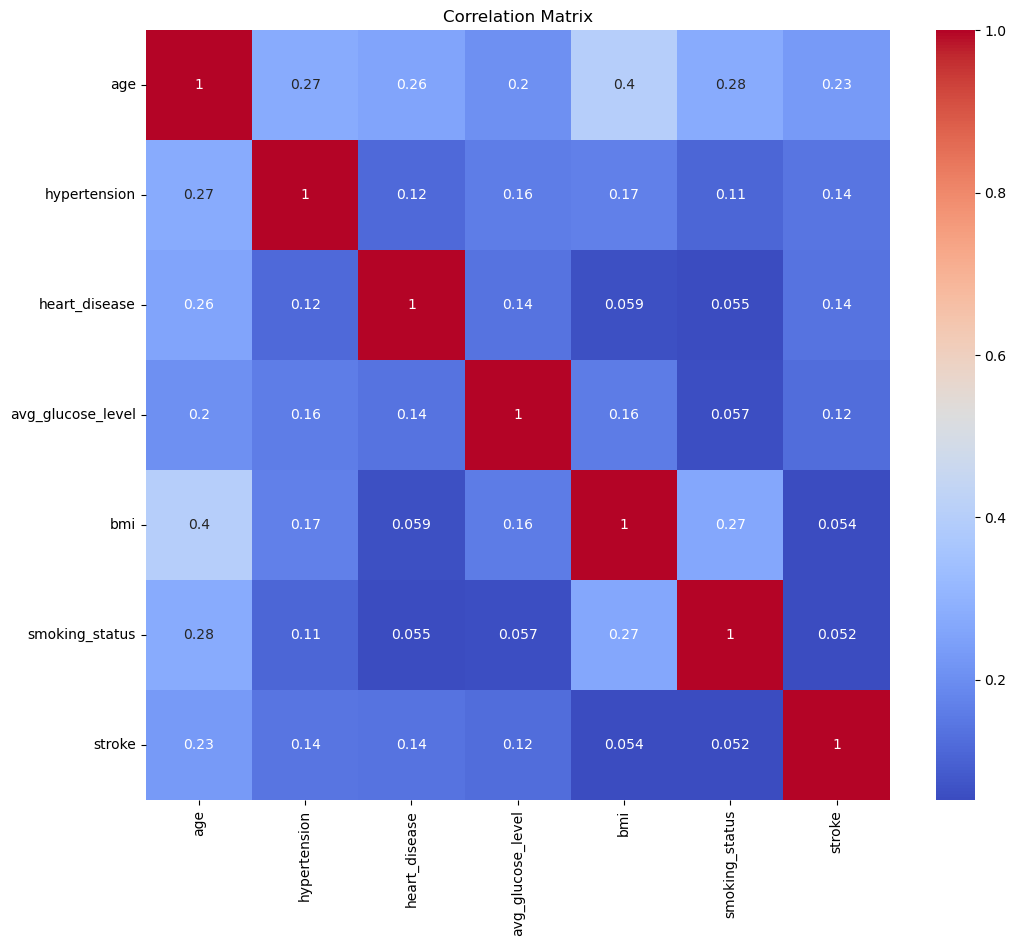

In [41]:
numeric_cols = ['age', 'hypertension','heart_disease', 'avg_glucose_level', 'bmi', 'smoking_status', 'stroke' ]
corr_matrix = df_new[numeric_cols].corr()

plt.figure(figsize= (12, 10))
sns.heatmap(corr_matrix, annot= True, cmap= 'coolwarm')
plt.title('Correlation Matrix')
plt.show()

In [42]:
df_new.columns

Index(['id', 'gender', 'age', 'hypertension', 'heart_disease', 'ever_married',
       'work_type', 'Residence_type', 'avg_glucose_level', 'bmi',
       'smoking_status', 'stroke'],
      dtype='object')

In [43]:
X = df_new[['gender', 'age', 'hypertension', 'heart_disease', 'ever_married',
       'work_type', 'Residence_type', 'avg_glucose_level', 'bmi',
       'smoking_status']]
y = df_new['stroke']

In [44]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.2, random_state= 42)
print(X_test.shape)
print(X_train.shape)

(982, 10)
(3927, 10)


In [45]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.model_selection import GridSearchCV

In [46]:
LR= LinearRegression()
LR.fit(X_train, y_train)
LR_predicted = LR.predict(X_test)

In [47]:
print("R^2 on training  data ",LR.score(X_train, y_train))
print("R^2 on testing data ",LR.score(X_test,y_test))

R^2 on training  data  0.07018205963755875
R^2 on testing data  0.08959194236250512


In [48]:
import tensorflow as tf


In [49]:
from sklearn.ensemble import RandomForestClassifier
rf_classifier = RandomForestClassifier(random_state= 42)
rf_classifier.fit(X_train, y_train)

y_pred = rf_classifier.predict(X_test)

In [50]:
from sklearn.metrics import accuracy_score
acc = accuracy_score(y_pred, y_test)
print(acc)

0.9460285132382892


In [51]:
X_train

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status
3404,0,40.0,0,0,1,2,1,4.186164,3.440418,2
843,0,59.0,0,0,1,3,1,4.402319,3.490429,0
2581,0,57.0,0,0,1,2,1,5.381739,3.600048,2
4020,1,81.0,0,0,1,3,1,4.265212,3.173878,1
2619,1,65.0,0,0,1,3,1,4.563097,3.349904,2
...,...,...,...,...,...,...,...,...,...,...
4426,0,19.0,0,0,0,2,1,4.492001,3.095578,2
466,0,51.0,0,0,1,2,0,4.417997,3.391147,3
3092,0,53.0,0,0,1,2,0,4.507006,3.095578,1
3772,0,11.0,0,0,0,4,0,4.538068,3.034953,0


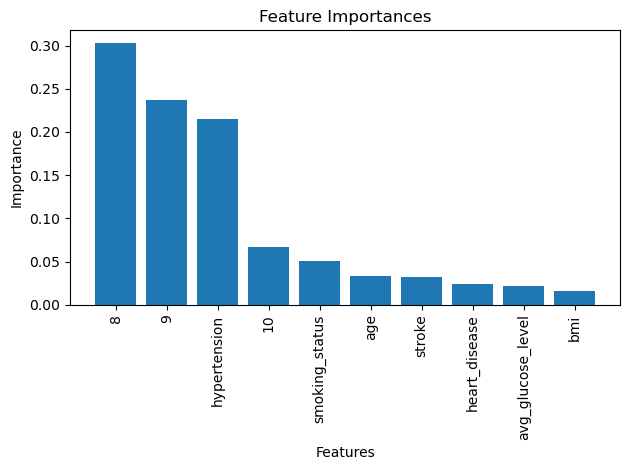

In [52]:
importances = rf_classifier.feature_importances_
indices = np.argsort(importances)[::-1]
features = ['age', 'hypertension', 'heart_disease', 'avg_glucose_level', 'bmi', 'smoking_status', 'stroke', '8', '9', '10', '11']
plt.figure()
plt.title('Feature Importances')
plt.bar(range(X.shape[1]), importances[indices], align='center')
plt.xticks(range(X.shape[1]), [features[i] for i in indices], rotation= 90)
plt.xlabel('Features')
plt.ylabel('Importance')
plt.tight_layout()
plt.show()

In [53]:
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
dtree = DecisionTreeClassifier()
dtree_ = dtree.fit(X_train, y_train)


[Text(0.4762084700183094, 0.9782608695652174, 'hypertension <= 66.5\ngini = 0.076\nsamples = 3927\nvalue = [3771, 156]'),
 Text(0.1622553974671956, 0.9347826086956522, 'hypertension <= 44.5\ngini = 0.036\nsamples = 3269\nvalue = [3209, 60]'),
 Text(0.028074458346048214, 0.8913043478260869, '8 <= 4.062\ngini = 0.006\nsamples = 1985\nvalue = [1979, 6]'),
 Text(0.01464754348489472, 0.8478260869565217, '8 <= 4.061\ngini = 0.07\nsamples = 55\nvalue = [53, 2]'),
 Text(0.009765028989929814, 0.8043478260869565, '8 <= 4.059\ngini = 0.036\nsamples = 54\nvalue = [53, 1]'),
 Text(0.004882514494964907, 0.7608695652173914, 'gini = 0.0\nsamples = 49\nvalue = [49, 0]'),
 Text(0.01464754348489472, 0.7608695652173914, '8 <= 4.059\ngini = 0.32\nsamples = 5\nvalue = [4, 1]'),
 Text(0.009765028989929814, 0.717391304347826, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]'),
 Text(0.019530057979859627, 0.717391304347826, 'gini = 0.0\nsamples = 4\nvalue = [4, 0]'),
 Text(0.019530057979859627, 0.8043478260869565, 'gi

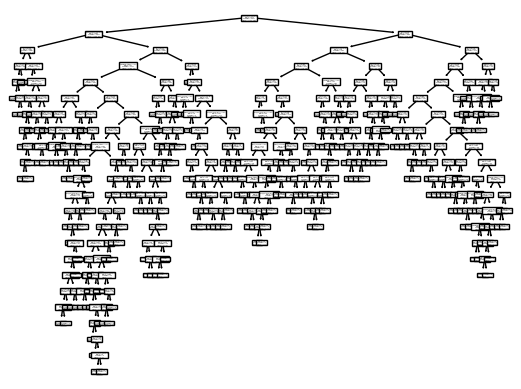

In [54]:
tree.plot_tree(dtree_, feature_names= features)

In [55]:
score = dtree.score(X_test, y_test)

print("Accuracy score:", score)

Accuracy score: 0.9256619144602851


In [56]:
import tensorflow as tf 
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam 

In [68]:
nn_model = Sequential([
    Dense(17, input_dim= 10, activation= 'relu'),
    Dense(15, activation= 'relu'),
    Dense(1, activation= 'sigmoid')
])

In [69]:
nn_model.compile(optimizer= Adam(learning_rate= 0.001, beta_1= 0.9, beta_2= 0.99,
                                 epsilon= 1e-05, amsgrad= False, name= 'Adam'),
                 loss='binary_crossentropy', metrics= ['accuracy'])
nn_model.fit(X_train, y_train.values.ravel(), epochs= 100)

Epoch 1/100
123/123 [==============================] - 1s 2ms/step - loss: 0.2621 - accuracy: 0.9277
Epoch 2/100
123/123 [==============================] - 0s 2ms/step - loss: 0.1508 - accuracy: 0.9603
Epoch 3/100
123/123 [==============================] - 0s 2ms/step - loss: 0.1499 - accuracy: 0.9600
Epoch 4/100
123/123 [==============================] - 0s 3ms/step - loss: 0.1465 - accuracy: 0.9603
Epoch 5/100
123/123 [==============================] - 0s 2ms/step - loss: 0.1449 - accuracy: 0.9605
Epoch 6/100
123/123 [==============================] - 0s 2ms/step - loss: 0.1465 - accuracy: 0.9598
Epoch 7/100
123/123 [==============================] - 0s 2ms/step - loss: 0.1461 - accuracy: 0.9595
Epoch 8/100
123/123 [==============================] - 0s 2ms/step - loss: 0.1443 - accuracy: 0.9603
Epoch 9/100
123/123 [==============================] - 0s 2ms/step - loss: 0.1476 - accuracy: 0.9590
Epoch 10/100
123/123 [==============================] - 0s 2ms/step - loss: 0.1457 - accura

In [ ]:
print(nn_model.evaluate(X_test, y_test))

31/31 [==============================] - 0s 2ms/step - loss: 0.1796 - accuracy: 0.9460
[0.17955385148525238, 0.9460285305976868]


In [ ]:
y_predicted_nn_model = nn_model.predict(X_test)
y_predicted_nn_model = np.round(y_predicted_nn_model)

In [ ]:
from sklearn.metrics import classification_report
print("Classification Report: \n", classification_report(y_test, y_predicted_nn_model))

Classification Report: 
               precision    recall  f1-score   support

           0       0.95      1.00      0.97       929
           1       0.00      0.00      0.00        53

    accuracy                           0.95       982
   macro avg       0.47      0.50      0.49       982
weighted avg       0.89      0.95      0.92       982



c:\Users\Predator\anaconda3\envs\TF_002\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\Predator\anaconda3\envs\TF_002\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\Predator\anaconda3\envs\TF_002\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [70]:
from tensorflow.keras.utils import to_categorical

y_train_encoded = to_categorical(y_train)


In [73]:
nn_model = Sequential([
    Dense(17, input_dim= 10, activation= 'relu'),
    Dense(15, activation= 'relu'),
    Dense(2, activation= 'softmax')
])

nn_model.compile(optimizer= Adam(learning_rate= 0.001, beta_1= 0.9, beta_2= 0.99,
                                 epsilon= 1e-05, amsgrad= False, name= 'Adam'),
                 loss='categorical_crossentropy', metrics= ['accuracy'])
hist= nn_model.fit(X_train, y_train_encoded, epochs= 100)

Epoch 1/100
123/123 [==============================] - 1s 3ms/step - loss: 0.2400 - accuracy: 0.9603
Epoch 2/100
123/123 [==============================] - 0s 3ms/step - loss: 0.1550 - accuracy: 0.9595
Epoch 3/100
123/123 [==============================] - 0s 3ms/step - loss: 0.1594 - accuracy: 0.9598
Epoch 4/100
123/123 [==============================] - 0s 2ms/step - loss: 0.1502 - accuracy: 0.9603
Epoch 5/100
123/123 [==============================] - 0s 2ms/step - loss: 0.1469 - accuracy: 0.9600
Epoch 6/100
123/123 [==============================] - 0s 3ms/step - loss: 0.1502 - accuracy: 0.9590
Epoch 7/100
123/123 [==============================] - 0s 2ms/step - loss: 0.1467 - accuracy: 0.9595
Epoch 8/100
123/123 [==============================] - 0s 2ms/step - loss: 0.1446 - accuracy: 0.9600
Epoch 9/100
123/123 [==============================] - 0s 2ms/step - loss: 0.1471 - accuracy: 0.9595
Epoch 10/100
123/123 [==============================] - 0s 2ms/step - loss: 0.1489 - accura

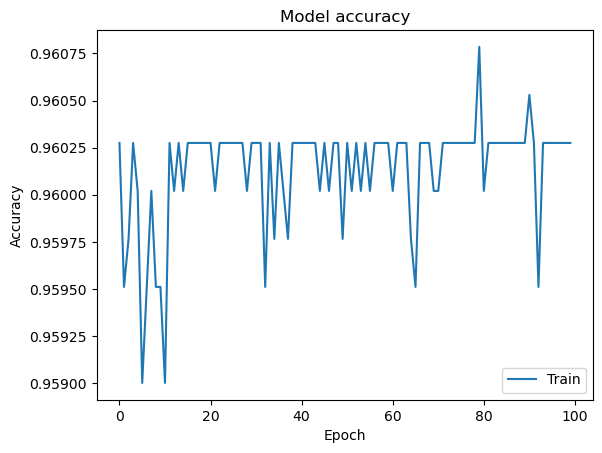

In [79]:
plt.plot(hist.history['accuracy'])
#plt.plot(hist.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='lower right')
plt.show()


KeyError: 'val_loss'

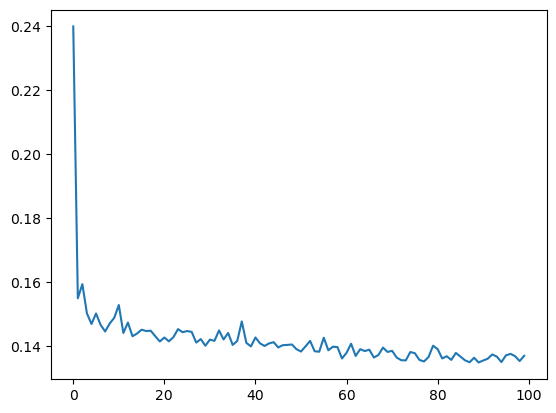

In [82]:
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper right')
plt.ylim(top=1.2, bottom=0)
plt.show()